In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, GRU, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam, SGD

from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv")

In [4]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [5]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [6]:
# Let's start doing it the wrong way
series = df["close"].values.reshape(-1, 1)

In [7]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [8]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, "Y.shape:", Y.shape)

X.shape: (1249, 10, 1) Y.shape: (1249,)


In [9]:
i = Input(shape=(T, 1))
x = LSTM(units=5)(i)
x = Dense(units=1)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.1), 
              loss=tf.keras.losses.mean_squared_error)

r = model.fit(x=X[:-N//2], y=X[:-N//2], 
              epochs=80, 
              validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
20/20 [==============================] - 8s 34ms/step - loss: 0.2051 - val_loss: 0.5097
Epoch 2/80
20/20 [==============================] - 0s 11ms/step - loss: 0.0467 - val_loss: 0.0216
Epoch 3/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0205 - val_loss: 0.0573
Epoch 4/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0145 - val_loss: 0.0615
Epoch 5/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0118 - val_loss: 0.0496
Epoch 6/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0102 - val_loss: 0.0525
Epoch 7/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.0412
Epoch 8/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.0496
Epoch 9/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0093 - val_loss: 0.0577
Epoch 10/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.0574
Epoch 11/80
20/20

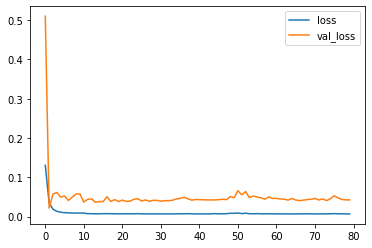

In [10]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

outputs.shape: (1249, 1)


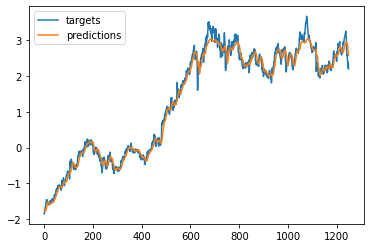

In [11]:
outputs = model.predict(X)
print("outputs.shape:", outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label="targets")
plt.plot(predictions, label="predictions")
plt.legend()
plt.show()

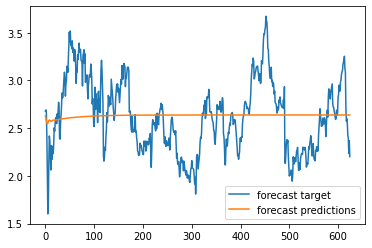

In [12]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, 1))[0, 0]
    validation_predictions.append(p)

    last_x = np.roll(last_x, -1)
    last_x[-1] = p


plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend()
plt.show()

In [15]:
df["Return"] = df["close"].pct_change()

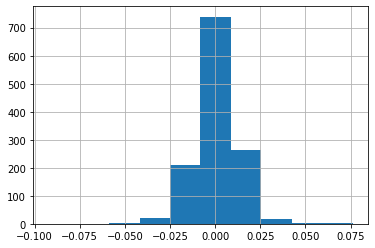

In [17]:
df["Return"].hist()
plt.show()

In [27]:
series = df.Return.values[1:].reshape(-1, 1)

In [28]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [29]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, "Y.shape:", Y.shape)

X.shape: (1248, 10, 1) Y.shape: (1248,)


In [30]:
i = Input(shape=(T, 1))
x = LSTM(units=5)(i)
x = Dense(units=1)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.01), 
              loss=tf.keras.losses.mean_squared_error)
model.fit(x=X[:-N//2], y=Y[:-N//2], 
          epochs=80, 
          validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
20/20 [==============================] - 2s 22ms/step - loss: 1.0129 - val_loss: 1.1458
Epoch 2/80
20/20 [==============================] - 0s 6ms/step - loss: 1.0244 - val_loss: 1.1556
Epoch 3/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9272 - val_loss: 1.1590
Epoch 4/80
20/20 [==============================] - 0s 6ms/step - loss: 1.0567 - val_loss: 1.1526
Epoch 5/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9196 - val_loss: 1.1588
Epoch 6/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9687 - val_loss: 1.1544
Epoch 7/80
20/20 [==============================] - 0s 6ms/step - loss: 1.0322 - val_loss: 1.1690
Epoch 8/80
20/20 [==============================] - 0s 6ms/step - loss: 1.1181 - val_loss: 1.1551
Epoch 9/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9343 - val_loss: 1.1464
Epoch 10/80
20/20 [==============================] - 0s 6ms/step - loss: 1.0748 - val_loss: 1.1582
Epoch 11/80
20/20 

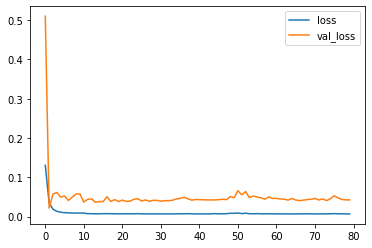

In [31]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

outputs.shape: (1248, 1)


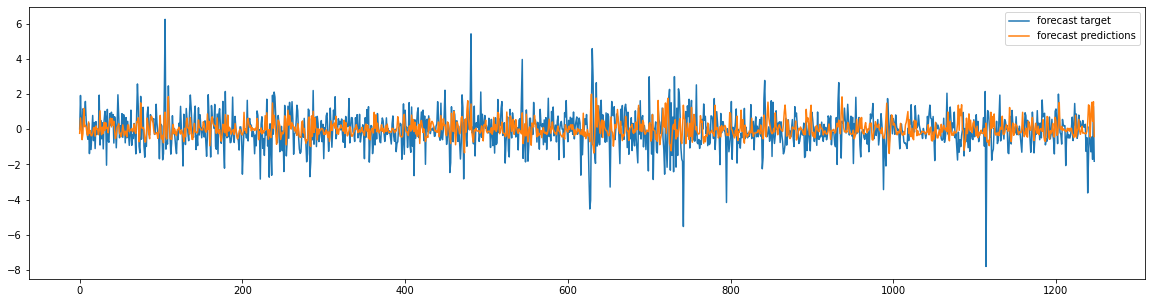

In [34]:
outputs = model.predict(X)
print("outputs.shape:", outputs.shape)
predictions = outputs[:, 0]

plt.figure(figsize=(20, 5))
plt.plot(Y, label="forecast target")
plt.plot(predictions, label="forecast predictions")
plt.legend()
plt.show()

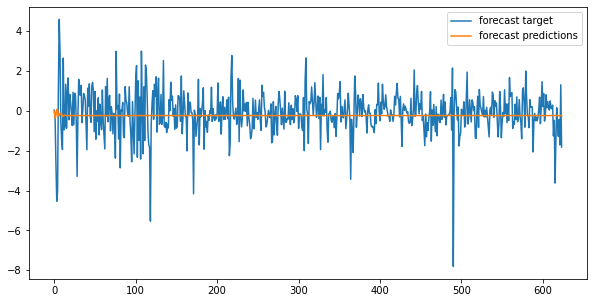

In [35]:
validation_target = Y[-N//2:]
validation_prediction = []

last_x = X[-N//2]

while len(validation_prediction) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, 1))[0, 0]

    validation_prediction.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.figure(figsize=(10, 5))
plt.plot(validation_target, label="forecast target")
plt.plot(validation_prediction, label="forecast predictions")
plt.legend()
plt.show()

In [37]:
# Let's try another way to predict the stock prices using binary classification
# Whether prices go up or down

input_data = df[["open", "high", "low", "close", "volume"]].values
targets = df.Return.values



In [39]:
T = 10
D = input_data.shape[1]
N = len(input_data) - T

In [40]:
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

In [48]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
    X_train[t, :, :] = input_data[t:t + T]
    Y_train[t] = (targets[t + T] > 0)

In [49]:
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
    t = u + Ntrain
    X_test[u, :, :] = input_data[t:t + T]
    Y_test[u] = (targets[t + T] > 0)

In [50]:
i = Input(shape=(T, D))
x = LSTM(units=50)(i)
x = Dense(1, activation=tf.keras.activations.sigmoid)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.001), 
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])
r = model.fit(x=X_train, y=Y_train, 
          epochs=300, 
          validation_data=(X_test, Y_test), 
          batch_size=32)

Epoch 1/300
27/27 [==============================] - 2s 19ms/step - loss: 0.6992 - accuracy: 0.5364 - val_loss: 0.6965 - val_accuracy: 0.4878
Epoch 2/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6991 - accuracy: 0.4724 - val_loss: 0.6944 - val_accuracy: 0.4878
Epoch 3/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5055 - val_loss: 0.6945 - val_accuracy: 0.4878
Epoch 4/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6921 - val_accuracy: 0.5049
Epoch 5/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5362 - val_loss: 0.6985 - val_accuracy: 0.4854
Epoch 6/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5408 - val_loss: 0.6924 - val_accuracy: 0.5024
Epoch 7/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.5605 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 8/300


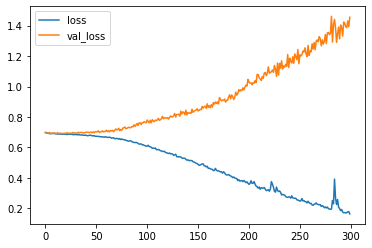

In [51]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

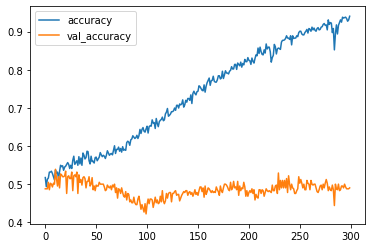

In [52]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()